In [104]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-28 15:15:51,114: Credentials are already in use. The existing account in the session will be replaced.


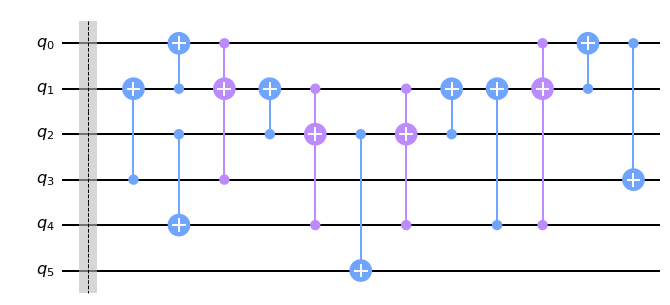

In [150]:
qc = QuantumCircuit(6)

qc.barrier()
qc.cx(3,1)
qc.cx(1,0)
qc.cx(2,4)
qc.ccx(0,3,1)
qc.cx(2,1)
qc.ccx(1,4,2)
qc.cx(2,5)
qc.ccx(1,4,2)
qc.cx(2,1)
qc.cx(4,1)
qc.ccx(0,4,1)
qc.cx(1,0)
qc.cx(0,3)
qc.draw()

simulator에서 transpile이 작동하지 않는다. 모든 회로가 바로 실행되기 때문

In [106]:
# import numpy as np

# from qiskit import QuantumCircuit
# from qiskit import Aer, transpile
# from qiskit.tools.visualization import plot_histogram, plot_state_city
# import qiskit.quantum_info as qi

In [107]:
# simulator = Aer.get_backend('aer_simulator')
# qc = transpile(qc, simulator)
# qc.draw()

In [47]:
# result = simulator.run(qc).result()
# counts = result.get_counts(qc)
# plot_histogram(counts, title='Ripple Carry Adder')

In [151]:
provider = IBMQ.get_provider(hub ='ibm-q', group='open', project='main')
backend = provider.get_backend('ibm_oslo')

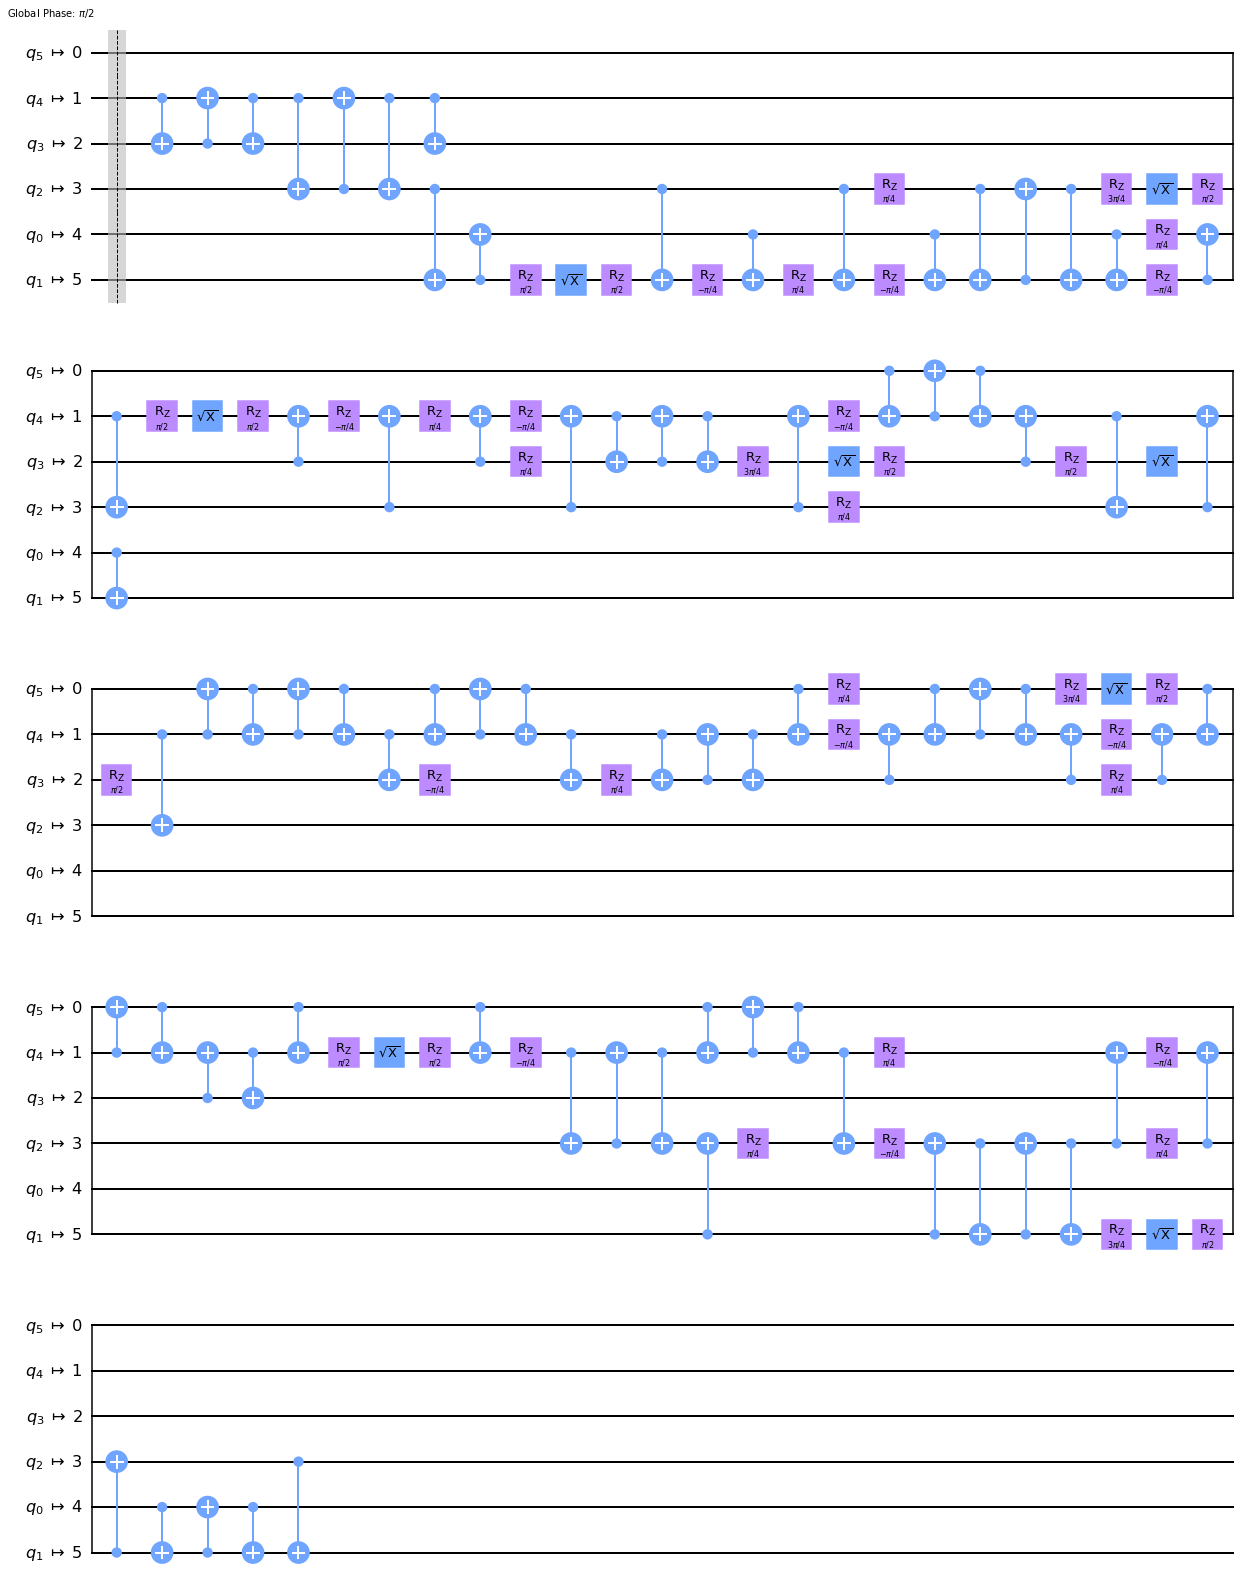

In [152]:
re_transpile=transpile(qc, backend)
re_transpile.draw(output='mpl', idle_wires=False)

In [158]:
#input------------------
#qc.x(1) #a0
# qc.x(2) #a1
# qc.x(3) #b0
# qc.x(4) #b1
#------------------------
qc.draw()

Traceback (most recent call last):
  Input In [158] in <cell line: 2>
    qc = x.compose(1, front=True) #a0
NameError: name 'x' is not defined

Use %tb to get the full traceback.


In [153]:
re_transpile.barrier()
qc.barrier()
re_transpile.measure_all()
qc.measure_all()

In [154]:
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

In [155]:
provider = IBMQ.get_provider(hub ='ibm-q', group='open', project='main')
backend = provider.get_backend('simulator_statevector')

In [156]:
simulator = QasmSimulator()
job = simulator.run(re_transpile, shots=10000)
result = job.result()
counts = result.get_counts(re_transpile)
print("transpiled circuit : ", counts)
job = simulator.run(qc, shots=10000)
result = job.result()
counts = result.get_counts(qc)
print("original circuit : ", counts)

transpiled circuit :  {'0000000': 10000}
original circuit :  {'000000': 10000}
